In [1]:
import os 
import time
import copy
from tqdm import tqdm

import numpy as np 
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import ishermitian
import pandas as pd

from joblib import Parallel, delayed
from numba import jit, njit, prange
import functools as ft

############## Local imports ##############
from hamiltonian_generation import make_H4_sparse

########### Define macros ############
np.random.seed(0)

K=7
J=4
Q=4
N=2*K
N_DIM = 2**K

############ Load test coefficients ############
js_fpath = os.path.join("Excel", 'test_coefficients_K{}_J{}_q{}.csv'.format(K,J,Q))
js_test = np.fromfile(js_fpath, sep = ',').reshape(tuple([N for i in range(Q)]))
js_test[0,0,0]

array([ 0.32995524,  0.07484697,  0.18306698,  0.41914542,  0.34931534,
       -0.18279387,  0.17770825, -0.02831044, -0.01930646,  0.07679995,
        0.02694247,  0.272013  ,  0.14234747,  0.02275857])

## Generate Hamiltonian

In [5]:
H4_func, psi, psi_pairs, psi_quads = make_H4_sparse(K, J, precompute_pairs = True, precompute_quads = True) # <-- This is the function being tested, by having its output compared to that of Mathematica
H4_test = H4_func(js_test).toarray()

Eigenvalues mostly real: True
[-2.71372914 -2.71372914 -2.50614971 -2.50614971 -2.39193942 -2.39193942
 -2.28531215 -2.28531215 -2.22671951 -2.22671951 -2.10895018 -2.10895018
 -2.06858285 -2.06858285 -1.94907982 -1.94907982 -1.92979535 -1.92979535
 -1.87834499 -1.87834499 -1.75334631 -1.75334631 -1.63392516 -1.63392516
 -1.53065414 -1.53065414 -1.44722728 -1.44722728 -1.36958049 -1.36958049
 -1.33619472 -1.33619472 -1.24297254 -1.24297254 -1.11626472 -1.11626472
 -1.06549167 -1.06549167 -0.92800271 -0.92800271 -0.88420049 -0.88420049
 -0.8172338  -0.8172338  -0.76443155 -0.76443155 -0.58825773 -0.58825773
 -0.53402193 -0.53402193 -0.43035009 -0.43035009 -0.41393383 -0.41393383
 -0.35249287 -0.35249287 -0.29932921 -0.29932921 -0.19663866 -0.19663866
 -0.10633302 -0.10633302 -0.00690898 -0.00690898  0.09732491  0.09732491
  0.14929888  0.14929888  0.19722888  0.19722888  0.27449905  0.27449905
  0.33413609  0.33413609  0.39162741  0.39162741  0.53649867  0.53649867
  0.6627846   0.66278

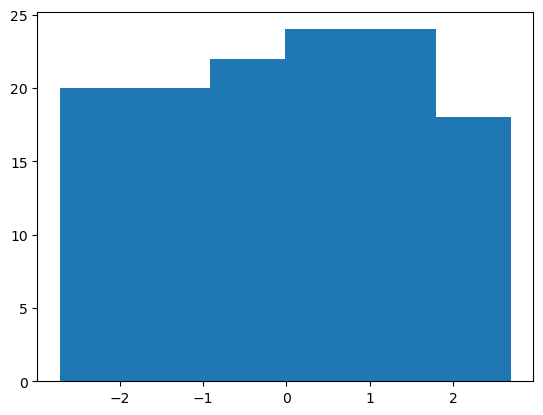

In [7]:
iv_test = np.linalg.eigvalsh(H4_test)
print(f"Eigenvalues mostly real: {np.allclose(iv_test, np.real(iv_test))}")
plt.hist(iv_test, bins=6)
print(np.sort(iv_test.real))

Boom, exactly the same eigenvalues as the Mathematica method